# Language identification in text


**Credit: [AITS Cainvas Community](https://discord.gg/x6xn39u)**

![](https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/language.gif)

*Photo by [Pendar Yousefi](https://dribbble.com/shots/13952396-Google-Translate-Updates) on [Dribbble](https://dribbble.com)*


Language detection refers to determining the language that the given text is written in.

This categorization becomes important when the language of the input data is not assumed. For example, the detect language feature of Google translate detects the language of the input text before translating it.

In [1]:
import numpy as np
import pandas as pd
from keras import layers, optimizers, losses, callbacks, models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import random

# The dataset

>[On Kaggle](https://www.kaggle.com/zarajamshaid/language-identification-datasst) by [Zara Jamshaid](https://www.kaggle.com/zarajamshaid)

>WiLI-2018, the Wikipedia language identification benchmark dataset, contains 235000 paragraphs of 235 languages.
After data selection and preprocessing 22 languages from the original dataset were selected to create the current dataset.

The dataset is a CSV file consisting of 1000 text samples from 22 languages each, making it a total of 22k sample sin the dataset.

In [2]:
df = pd.read_csv('https://cainvas-static.s3.amazonaws.com/media/user_data/cainvas-admin/language_dataset.csv')
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [3]:
df['language'].value_counts()

Russian       1000
Thai          1000
Latin         1000
Urdu          1000
Pushto        1000
Arabic        1000
Hindi         1000
French        1000
Portugese     1000
Indonesian    1000
Estonian      1000
Turkish       1000
Japanese      1000
Persian       1000
Korean        1000
Swedish       1000
English       1000
Tamil         1000
Dutch         1000
Chinese       1000
Spanish       1000
Romanian      1000
Name: language, dtype: int64

This is a balanced dataset!

# Preprocessing

## One hot encoding

This is a multi-class classification problem where the classes do not have any range dependency. Thus the languages are one hot encoded for classification purposes.

In [4]:
languages_onehot = pd.get_dummies(df['language'])

languages = languages_onehot.columns

for column in list(languages):
    df[column] = languages_onehot[column]
    
df

,Text,language,Arabic,Chinese,Dutch,English,Estonian,French,Hindi,Indonesian,...,Portugese,Pushto,Romanian,Russian,Spanish,Swedish,Tamil,Thai,Turkish,Urdu
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,de spons behoort tot het geslacht haliclona en...,Dutch,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,hors du terrain les années et sont des année...,French,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21997,con motivo de la celebración del septuagésimoq...,Spanish,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Visualization

A peek into the samples from different languages!

In [5]:
for language in languages:
    df_temp = df[df['language'] == language]
    print("\n", language, "\n", df_temp['Text'].to_list()[0], sep = "")


Arabic
قبل عام بالضبط وبتاريخ  أعلن البغدادي خطة هدم الأسوار وبتاريخ  هاجمت داعش سجنين في بغداد هما سجن التاجي وسجن بغداد المركزي ونجحت في تهريب أكثر من  معتقل 

Chinese
胡赛尼本人和小说的主人公阿米尔一样，都是出生在阿富汗首都喀布尔，少年时代便离开了这个国家。胡赛尼直到年小说出版之后才首次回到已经离开年的祖国。他在苏联入侵时离开了阿富汗，而他的很多童年好友在阿富汗生活艰难，还有一些表亲离开人世，其中一位在童年时代和他一起放风筝的表兄弟就是在逃离阿富汗时死在了油罐车中（这一情节在《追风筝的人》中也有描写），而这位表兄弟的父亲也被人枪杀；因此胡赛尼总是怀有幸存者所特有的一种内疚心态，这种情感在小说中也有体现。很多人因此认为这部小说有些自传色彩。胡赛尼则表示小说中确实有一部分内容是根据自己的经历创作的，他和故事主人公也有很多相似点，但是一些内容被他刻意地模糊处理了。尽管和主人公的经历有诸多的相似点，胡赛尼仍然坚称小说情节确实是虚构的。之后胡赛尼在创作他的第二部小说《灿烂千阳》时把主人公设定为女性，称“这样应该就能一劳永逸地解决人们关于‘自传’的问题了”。

Dutch
de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in  door kudelin

English
in  johnson was awarded an american institute of architects gold medal in  he became the first recipient of the pritzker architecture prize the most prestigious international architectural award

Estonian
klement gottwaldi surnukeha palsam

If we look closer into the samples, we can see that there are few English words in the Urdu sample and transliterated words in Thai too! This may lead to ambiguities during prediction.

# Preproccessing

#### (Continued...)

## Train-val-test split

In [6]:
# Splitting into train, val and test set -- 80-10-10 split

# First, an 80-20 split
train_df, val_test_df = train_test_split(df, test_size = 0.2, random_state = 3)

# Then split the 20% into half
val_df, test_df = train_test_split(val_test_df, test_size = 0.5, random_state = 3)

print("Number of samples in...")
print("Training set: ", len(train_df))
print("Validation set: ", len(val_df))
print("Testing set: ", len(test_df)) 

Number of samples in...
Training set:  17600
Validation set:  2200
Testing set:  2200


## Bag of Words

In [7]:
cv = CountVectorizer(ngram_range = (1,1), max_features=20000)

train_bow = cv.fit_transform(train_df['Text'])
val_bow = cv.transform(val_df['Text'])
test_bow = cv.transform(test_df['Text'])

In [8]:
Xtrain = train_bow.toarray()
ytrain = train_df[languages]

Xval = val_bow.toarray()
yval = val_df[languages]

ytest = test_df[languages]
Xtest = test_bow.toarray()

## Standardization

In [9]:
std_scaler = StandardScaler()

Xtrain = std_scaler.fit_transform(Xtrain)
Xval = std_scaler.transform(Xval)
Xtest = std_scaler.transform(Xtest)

# The model

In [10]:
model = models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = Xtrain[0].shape),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(len(languages), activation = 'softmax')
])

cb = [callbacks.EarlyStopping(patience = 5, restore_best_weights = True)]

In [11]:
model.compile(optimizer = optimizers.Adam(0.001), loss = losses.CategoricalCrossentropy(), metrics = ['accuracy'])

history = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 64, callbacks = cb)

Epoch 1/64
550/550 [==============================] - 2s 3ms/step - loss: 0.5025 - accuracy: 0.8715 - val_loss: 0.1542 - val_accuracy: 0.9468
Epoch 2/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9699 - val_loss: 0.1402 - val_accuracy: 0.9523
Epoch 3/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0528 - accuracy: 0.9747 - val_loss: 0.1489 - val_accuracy: 0.9550
Epoch 4/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0454 - accuracy: 0.9766 - val_loss: 0.1407 - val_accuracy: 0.9509
Epoch 5/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9769 - val_loss: 0.1387 - val_accuracy: 0.9505
Epoch 6/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9770 - val_loss: 0.1650 - val_accuracy: 0.9500
Epoch 7/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0431 - accuracy: 0.9764 - val_loss: 0.1983 - val_accuracy: 0.9391
Epoch 

In [12]:
model.compile(optimizer = optimizers.Adam(0.0001), loss = losses.CategoricalCrossentropy(), metrics = ['accuracy'])

history1 = model.fit(Xtrain, ytrain, validation_data = (Xval, yval), epochs = 64, callbacks = cb)

Epoch 1/64
550/550 [==============================] - 2s 3ms/step - loss: 0.0403 - accuracy: 0.9768 - val_loss: 0.1558 - val_accuracy: 0.9495
Epoch 2/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0395 - accuracy: 0.9776 - val_loss: 0.1570 - val_accuracy: 0.9491
Epoch 3/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0389 - accuracy: 0.9788 - val_loss: 0.1752 - val_accuracy: 0.9486
Epoch 4/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0392 - accuracy: 0.9774 - val_loss: 0.1614 - val_accuracy: 0.9509
Epoch 5/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9769 - val_loss: 0.1676 - val_accuracy: 0.9505
Epoch 6/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0393 - accuracy: 0.9773 - val_loss: 0.1532 - val_accuracy: 0.9555
Epoch 7/64
550/550 [==============================] - 1s 3ms/step - loss: 0.0390 - accuracy: 0.9781 - val_loss: 0.1649 - val_accuracy: 0.9527
Epoch 

In [13]:
model.evaluate(Xtest, ytest)

69/69 [==============================] - 0s 2ms/step - loss: 0.2521 - accuracy: 0.9427


[0.2520904839038849, 0.942727267742157]

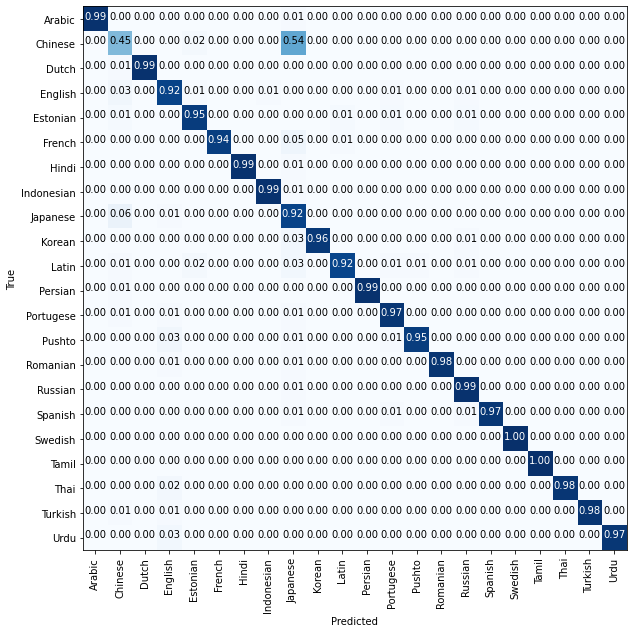

In [14]:
cm = confusion_matrix(np.argmax(ytest.to_numpy(), axis = 1), np.argmax(model.predict(Xtest), axis = 1))
cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111)

for i in range(cm.shape[1]):
    for j in range(cm.shape[0]):
        if cm[i,j] > 0.8:
            clr = "white"
        else:
            clr = "black"
        ax.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color=clr)

_ = ax.imshow(cm, cmap=plt.cm.Blues)
ax.set_xticks(range(len(languages)))
ax.set_yticks(range(len(languages)))
ax.set_xticklabels(languages, rotation = 90)
ax.set_yticklabels(languages)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plotting the metrics

In [15]:
def plot(history1, history2, variable1, variable2):
    # combining metrics from both trainings    
    var1_history = history1[variable1]
    var1_history.extend(history2[variable1])
    
    var2_history = history1[variable2]
    var2_history.extend(history2[variable2])
    
    # plotting them
    plt.plot(range(len(var1_history)), var1_history)
    plt.plot(range(len(var2_history)), var2_history)
    plt.legend([variable1, variable2])
    plt.title(variable1)

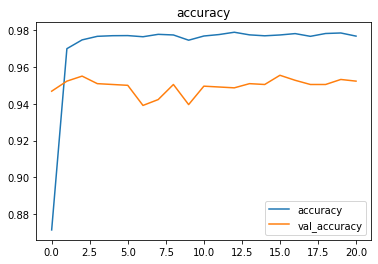

In [16]:
plot(history.history, history1.history, "accuracy", 'val_accuracy')

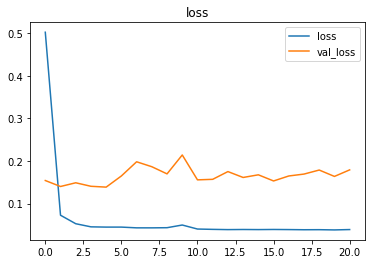

In [17]:
plot(history.history, history1.history, "loss", 'val_loss')

# Prediction

In [18]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

print("Sample:\n", test_df['Text'].to_numpy()[x], sep = "")

input = cv.transform([test_df['Text'].to_numpy()[x]]).toarray()

output = model.predict(input)
pred = np.argmax(output[0])    # finding max
print("\nPredicted: ", languages[pred])    # Picking the label from class_names based on the model output
print("Probability: ", output[0][pred])

output_true = test_df['language'].to_numpy()[x]

print("\nTrue: ", output_true)

Sample:
i̇talya yarımadasında antik romadan önce gelişmiş bir diğer kültür ise magna grecia kültürüdür yarımadanın güney ucunda yunanlar tarafından geliştirilmiş bu kültürün izleri bölgede hala konuşulmakta olan antik bir yunan lehçesi dolayısıyla günümüze kadar ulaşmıştır açlık iklim koşulları felaketler gibi nedenlerle yunanistanı terkederek i̇talyanın güneyine yerleşen bu kavimler i̇talya kültürüne önemli katkılarda bulunmuşlardır roma i̇mparatorluğunun yıkılmasından sonraki yıllarda dahi bizans i̇mparatorluğundan çeşitli nedenlerle ayrılan yunanlar bu bölgeye yerleşerek i̇talyanın güney bölgesindeki yunan uygarlığını canlı tutmuşlardır günümüzde bölge tamamen i̇talyanlaşmış olmakla birlikte küçük bir azınlık griko dili denen bir yunan lehçesini hala konuşmaya devam etmiştir

Predicted:  Turkish
Probability:  0.5120658

True:  Turkish


# deepC

In [19]:
model.save('language.h5')

!deepCC language.h5

[INFO]
Reading [keras model] 'language.h5'
[SUCCESS]
Saved 'language.onnx'
[INFO]
Reading [onnx model] 'language.onnx'
[INFO]
Model info:
  ir_vesion : 4
  doc       : 
[WARNING]
[ONNX]: terminal (input/output) dense_input's shape is less than 1. Changing it to 1.
[WARNING]
[ONNX]: terminal (input/output) dense_3's shape is less than 1. Changing it to 1.
WARN (GRAPH): found operator node with the same name (dense_3) as io node.
[INFO]
Running DNNC graph sanity check ...
[SUCCESS]
Passed sanity check.
[INFO]
Writing C++ file 'language_deepC/language.cpp'
[INFO]
deepSea model files are ready in 'language_deepC/' 
[RUNNING COMMAND]
g++ -std=c++11 -O3 -fno-rtti -fno-exceptions -I. -I/opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/include -isystem /opt/tljh/user/lib/python3.7/site-packages/deepC-0.13-py3.7-linux-x86_64.egg/deepC/packages/eigen-eigen-323c052e1731 language_deepC/language.cpp -o language_deepC/language.exe
[RUNNING COMMAND]
size "language_dee

In [20]:
# pick random test data sample from one batch
x = random.randint(0, len(Xtest) - 1)

print("Sample:\n", test_df['Text'].to_numpy()[x], "\n", sep = "")

input = cv.transform([test_df['Text'].to_numpy()[x]]).toarray()

np.savetxt('sample.data', input)    # xth sample into text file

# run exe with input
!language_deepC/language.exe sample.data

# show predicted output
nn_out = np.loadtxt('deepSea_result_1.out')

output = model.predict(input)
pred = np.argmax(output[0])    # finding max
print("\nPredicted: ", languages[pred])    # Picking the label from class_names based on the model output
print("Probability: ", output[0][pred])
output_true = test_df['language'].to_numpy()[x]

print("\nTrue: ", output_true)


Sample:
liber manu scriptus in bibliotheca britannica servatus sub pittacio royal cxii continet libellus de re coquinaria titulum carens saeculo xiv ineunte scriptus

reading file sample.data.
writing file deepSea_result_1.out.

Predicted:  Latin
Probability:  0.07819801

True:  Latin
